# Nursery Scenario

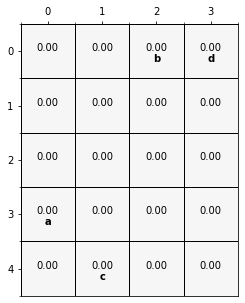

In [1]:
%matplotlib inline
from mdp import GridMDP
from oa import OmegaAutomaton
import numpy as np 
from csrl import ControlSynthesis

ltl = ('G ('
    '(!d) & '
    '((b & (!(X b)))->(X ((!b) U (a|c)))) & '
    '(((!b) & (X b) & (!(X X b)))->((!a) U c)) & '
    '(a->(X ((!a) U b))) & '
    '(c->((!a) U b)) & '
    '((b & (X b))->(F a))'
')')
oa = OmegaAutomaton(ltl)
display(oa)

shape = (5,4)
structure = np.array([
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E']
])
label = np.array([
[(),    (),    ('b',),('d',)],
[(),    (),    (),    ()],
[(),    (),    (),    ()],
[('a',),(),    (),    ()],
[(),    ('c',),(),    ()]
],dtype=np.object)
grid_mdp = GridMDP(shape=shape,structure=structure,label=label)
grid_mdp.plot()

discount=0.9999
csrl = ControlSynthesis(grid_mdp,oa,discount)

In [ ]:
Q=csrl.q_learning(T=1000,K=100000)

In [ ]:
value=np.max(Q,axis=4)
csrl.plot(value)

In [ ]:
policy=np.argmax(Q,axis=4)
csrl.plot(value,policy)

In [ ]:
_=episode=csrl.simulate(policy,start=(0,0),T=1000)